# Fitting neutrino oscillations parameters using DUNE FD flux prediction

The DUNE experiment will be in USA, aiming to measure neutrino oscillation parameters by fitting an oscillation model to the observed data. The three-flavour neutrino oscillation model (that is implemented in the class PMNS, see below) gives a probability of oscillation of a neutrino, with a given energy and flavour, to being observed as another flavour of neutrino after some distance of travel. 

To measure this effect a dominantly muon-neutrino beam is sent from the Fermilab accelerator complex to 1300 km away to the Sanford Underground Research Laboratory. The beam is measured by a Near Detector (at Fermilab) and a Far Detector (in Sanford).

Neutrinos oscillate from one flavour to the other according to a $3\times3$ PMNS (Pontecorvo-Maki-Nakagawa-Sakata) parametrization matrix, $U$, which can have complex values. One way to write the full 3-flavour oscillation probability is this:

\begin{equation}
P_{\alpha\rightarrow\beta} = \delta_{\alpha\beta} - 4\sum_{i > j}Re(U^{*}_{\alpha i}U_{\beta i}U_{\alpha j}U_{\beta j}^{*})sin^{2}\left(\frac{\Delta m_{ij}^{2} L}{4E}\right) + 2\sum_{i > j}Im(U^{*}_{\alpha i}U_{\beta i}U_{\alpha j}U_{\beta j}^{*})sin\left(\frac{\Delta m_{ij}^{2} L}{2E}\right)
\end{equation}

where $L$ is the distance of the travel, $E$ is the neutrino energy and $\Delta m_{ij}^{2} = m_{i}^{2} - m_{j}^{2}$ is the squared mass differences between the mass eigenstates. With the help of python we can visualize the oscillations. The python class, called PMNS, calculates the 3-flavour neutrino oscillation probabilities as a function of neutrino energy and distance. It assumes the Particle Data Group best values for the oscillation parameters. We plot the probability of electron neutrino appreance as a function of the neutrino energy. We plot it for two different oscillation parameter values for $\Theta_{23}$: the standard value from PDG, and a bit larger one and see how it affects the energy spectrum.


PDG Theta_23:  0.6724753607934152
Alternative Theta_23:  0.738
Theta_12 0.5490805826774161
Theta_13


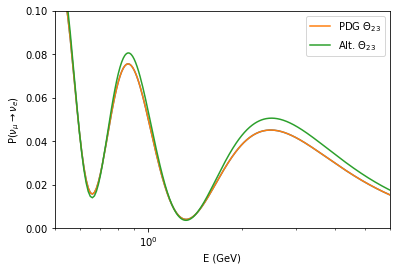

In [1]:
# Calculate neutrino oscillation probabilities for DUNE
# Labeling of the neutrino flavours: nu_e: 0, nu_mu: 1, nu_tau: 2
# E.g. oscillating from nu_mu to nu_e: 1 -> 0

from PMNS2 import PMNS
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# instantiate the class of PMNS
x = PMNS()
# Set the dCP parameter values in radians
x.setDeltaCP(-np.pi/2)
# Set the Mass hierarchy to NH (1) or IH (-1)
# Second argument is whether to use one-mass scale approximation 
x.setMassOrderModel(1, False)
# Evaluate the PMNS matrix elements
x.calcPMNS()

# Check what the values are
print("PDG Theta_23: ", x.theta_23)

Prob = [] # Probability array
Enu = [] # Neutrino energy array
E = 2.5 # beam energy, [GeV]
L = 1300 # DUNE baseline [km]


# Array of energies to plot oscillation probability
for v in np.array(np.arange(0.5,10,0.01)):
    value = x.calcOsc_E(1, 0, L, v)
    Prob.append(value)
    Enu.append(v)
    
# Plot
plt.plot(Enu,Prob)
plt.semilogx(Enu,Prob, label=r'PDG $\Theta_{23}$')
plt.ylabel(r'P($\nu_{\mu} \rightarrow \nu_{e}$)')
plt.xlabel('E (GeV)')
plt.axis([0.5, 6, 0., 0.1])

# Create another instance of PMNS to compare osc probability with varies PMNS parameters
x2 = PMNS()
x2.setDeltaCP(-np.pi/2)
# Now set a different parameter for Theta_23
x2.theta_23 = 0.738
x2.setMassOrderModel(1, False)
x2.calcPMNS()
print("Alternative Theta_23: ", x2.theta_23)
print("Theta_12", x2.theta_12)
print("Theta_13")

Prob2 = []
for v in np.array(np.arange(0.5,10,0.01)):
    value = x2.calcOsc_E(1, 0, L, v)
    Prob2.append(value)
plt.semilogx(Enu,Prob2, label=r'Alt. $\Theta_{23}$')
plt.legend()
plt.show()


In the figure above one can see that the flavor oscillation results in an oscillating neutrino energy spectrum. Therefore, for a given flux of neutrinos and a fixed detector, one can calculate for a variety of oscillation parameter values what the model-predicted neutrino energy spectrum would look like and compare that with data to get the best parameter estimates that match the model to the data.

To measure the neutrino oscillation probabilities from counting events at the Far Detector (FD), one needs an unoscillated flux model, a target volume mass and a cross section model. 

We use a fixed neutrino flux model given from DUNE. It is given for a nominal integrated flux per $10^{21}$ POT (Protons on Target). We scale all the results to some arbitrary integrated flux in the following demo example. Lowering the integrated flux will increase the amount of fluctuation in the data and therefore lowers the amount of confidence obtained for the parameters of interest.

The target at the FD is a large liquid Argon detector. Therefore one needs the total neutrino scattering cross section on Argon. This is obtained from GENIE as the total Charge Current cross section of neutrinos scattering on Argon. In addition, we are going to use a tuned, unoscillated neutrino flux prediction. These are imported from the external file Flux_CrossSection_model.py .

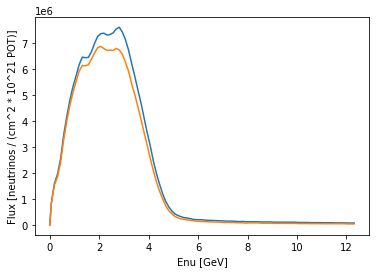

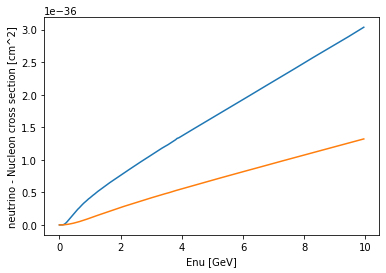

In [2]:
# Import Flux and Cross section data
from Flux_CrossSection_model import Flux, AFlux, E, e, xsec, axsec, npoints, flux_norm

# You can use this to scale to a different integrated flux
flux_norm = 1

# Expected POT per year for 120 GeV/c proton beam per year (1.1e+21) is taken from
# https://arxiv.org/pdf/1512.06148.pdf
# Assumed 1.5+1.5 years of operation in neutrino and antineutrino beam mode.
# See the Flux_CrossSection_model.py file for further details

plt.plot(E,Flux, label='DUNE FD numu FHC flux')
plt.plot(E,AFlux, label='DUNE FD anti-numu RHC flux')
plt.xlabel("Enu [GeV]")
plt.ylabel("Flux [neutrinos / (cm^2 * 10^21 POT)]")
plt.show()

plt.plot(e,xsec, label='nu->Ar xsec')
plt.plot(e,axsec, label='anti-nu->Ar xsec')

plt.xlabel("Enu [GeV]")
plt.ylabel("neutrino - Nucleon cross section [cm^2]")
plt.show()

The units are important. Above we have the Flux in unit of $[neutrinos/cm^2]$ per $10^{21}$ POT (Proton on Target). While the cross section unit is $[10^{-38}cm^{2}]$. Then we need the distance, target mass, molar mass and oscillation model to make a prediction for the amount of detected events at the FD after oscillation. Also, we are going to use the $\nu_{e}$ electron neutrino appereance mode, that is oscillation probabilities using $P(\nu_{\mu} \rightarrow \nu_{e}$). Let's do it in a code:

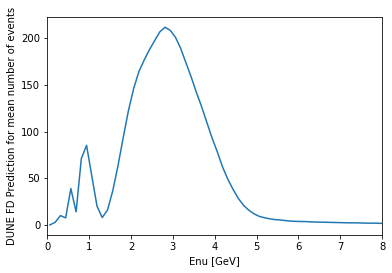

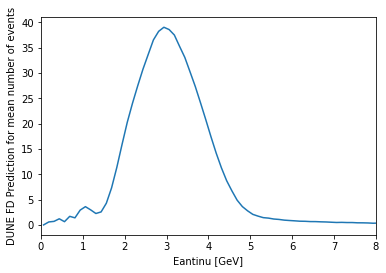

In [65]:
# FD Distance
L = 1300 # kilometers

# DUNE FD LAr fiducial mass 40 kton 
M_fid = 40e+09 # g
Density = 1394 # kg/m3
Density_gcm3 = 1.394 # g/cm3
Mol = 6e+23 # Avogadro n of particles per mol
m_Molar = 39.95 # g/Mol

# This is the neutrino oscillation model instance again
x = PMNS()
x.setDeltaCP(-np.pi/2) # True dCP value, radians
x.theta_23 = 0.7 # True theta23 value, radians
x.setMassOrderModel(1, False)
x.calcPMNS()

# Let's calculate the mean prediction for the FD with a neutrino beam
Nev = []
Ev = []
for i in np.array(np.arange(0,npoints)):
    if E[i] > 0:
        prob = x.calcOsc_E(1, 0, L, E[i])
        Ev.append(E[i])
        #prob = 1
        Nev.append( prob*flux_norm*np.interp(E[i], E, Flux) * np.interp(E[i], e,xsec) * M_fid * Mol/m_Molar)
        # [prob]*[n_events/(cm2*10^21 POT)]*[cm2]* ([g] / [g/Mol])* [n/Mol] = [n_events]
        #
        # flux_norm is a unitless normalization

# this is the mean prediction
plt.plot(Ev,Nev)
#plt.ylim(0.0, 25.0)
plt.xlim(0.0, 8.0)
plt.xlabel("Enu [GeV]")
plt.ylabel("DUNE FD Prediction for mean number of events")
plt.show()

# Let's calculate the mean prediction for the FD with an anti-neutrino beam
Nev2 = []
for i in np.array(np.arange(0,npoints)):
    if E[i] > 0:
        prob = x.calcOsc_E_conj(1, 0, L, E[i])
        #prob = 1
        Nev2.append( prob*flux_norm*np.interp(E[i], E, AFlux) * np.interp(E[i], e,axsec) * M_fid * Mol/m_Molar)
        # [prob]*[n_events/(cm2*10^21 POT)]*[cm2]* ([g] / [g/Mol])* [n/Mol] = [n_events]

# this is the mean prediction
plt.plot(Ev,Nev2)
#plt.ylim(0.0, 25.0)
plt.xlim(0.0, 8.0)
plt.xlabel("Eantinu [GeV]")
plt.ylabel("DUNE FD Prediction for mean number of events")
plt.show()

The above is only the prediction of the "mean" number of electron neutrino events detected at the FD. In reality the measurement fluctuates following the Poisson distribution around the mean expectation. Therefore, the observation is a random sampling from this mean, and we need to randomly sample for each energy bin from a Poisson PDF with the mean given by the mean values for each energy. Note that we need to interpolate the cross section and flux model to evaluate it at arbitrary energy values:

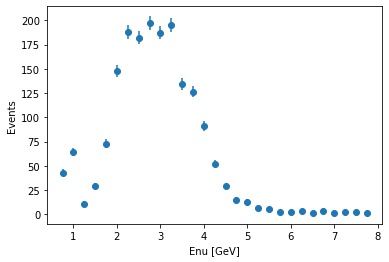

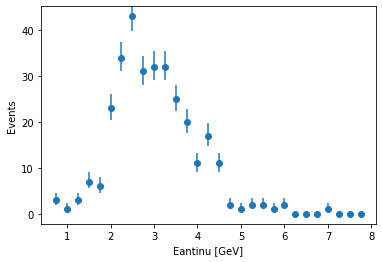

Number of neutrino events:  1805
Number of anti-neutrino events:  310


In [69]:
# Add Poisson fluctuation to the mean prediction

from scipy.stats import chi2
Data1 = []
DataerrLow1= []
DataerrUp1 = []
Data2 = []
DataerrLow2= []
DataerrUp2 = []
EData = []
for ei in np.array(np.arange(0.75, 8, 0.25)):
    if ei > 0:
        # Generate (discrete) random Poisson, given a mean expectation for neutrinos
        Nobs = np.random.poisson(np.interp(ei, np.asarray(Ev,dtype=np.float32),
                                             np.asarray(Nev,dtype=np.float32)))
        Data1.append(Nobs)
        # 68% asymmetric error on Poisson from chi2 quantiles
        DataerrLow1.append(Nobs - 0.5*chi2.ppf(1-0.68, 2*Nobs))
        DataerrUp1.append(0.5*chi2.ppf(0.68, 2*(Nobs+1))-Nobs) 
        
        # Generate (discrete) random Poisson, given a mean expectation for antineutrinos
        Nobs = np.random.poisson(np.interp(ei, np.asarray(Ev,dtype=np.float32),
                                             np.asarray(Nev2,dtype=np.float32)))
        Data2.append(Nobs)
        # 68% asymmetric error on Poisson from chi2 quantiles
        DataerrLow2.append(Nobs - 0.5*chi2.ppf(1-0.68, 2*Nobs))
        DataerrUp2.append(0.5*chi2.ppf(0.68, 2*(Nobs+1))-Nobs)
        
        EData.append(ei)

# Plot the Poisson fluctuated "data"
plt.errorbar(EData, Data1, yerr=[DataerrLow1,DataerrUp1], fmt='o')
#plt.ylim(0.0, 25.0)
plt.xlabel("Enu [GeV]")
plt.ylabel("Events")
plt.show()

plt.errorbar(EData, Data2, yerr=[DataerrLow2,DataerrUp2], fmt='o')
#plt.ylim(0.0, 25.0)
plt.xlabel("Eantinu [GeV]")
plt.ylabel("Events")
plt.show()

# Combine the two Data arrays two a single array
Data = Data1+Data2

print("Number of neutrino events: ", np.sum(Data1))
print("Number of anti-neutrino events: ", np.sum(Data2))

# Using Bayes theorem and PyMC3 to fit the data with the PMNS model

We try to estimate the parameters of our oscillation model given the data. We use the Bayes-theorem to do this. The Bayes-theorem is as follows:

$$ \boxed{ P(A|D) = \frac{P(D|A)P(A)}{P(D)} }$$ 

Here $A$ is a model parameter, $D$ is the set of observed data. The interpretation of this equation is as follows: the probability of the value of the model parameter $A$, given the data $D$ (that is $P(A|D)$), can be calculated from the probability (or likelihood) of the data $D$, given a parameter value $A$ (that is $P(D|A)$), times a _prior_ probability of the parameter value, $P(A)$, and devided by a normalization factor, $P(D)$. The left-hand side is traditionally called the _posterior_ probability (i.e. after seeing the data), while the terms on right-hand side are called the _likelihood_ function and the _prior_ probability.

As the normalization value, $P(D)$, does not depend on the parameter value, we can recast the equation as 

$$ \boxed{ P(A|D) \propto P(D|A)P(A)}$$ 

The objective is to calculate the left-hand side by evaluating the known quantities on the right-hand side. Although there are cases where this can be done analytically, this example serves to show you the numerical way of evaluating this using the very easy PyMC3 python package.



In [70]:
# First we create a function that gives the mean prediction for the neutrino energy spectrum
# as a function of the parameters (for the likelihood function)
import scipy.stats as stats
import theano
import theano.tensor as t
from theano.compile.ops import as_op
theano.config.compute_test_values = 'ignore'

# Create another instance of PMNS class
xnew = PMNS()


# Predicted mean energy spectrum for neutrino
@as_op(itypes=[t.dscalar, t.dscalar],otypes=[t.dvector])
def GetVectorMeans(theta23, deltacp):
    xnew.theta_23 = theta23 #radian
    xnew.setDeltaCP(deltacp) # radian
    #xnew.delta_m32 = dm32 # if you would ever want to add dependence on this...
    #xnew.setMassOrderModel(1, False, scale_=dm32/m32nominal_norm)
    xnew.setMassOrderModel(1, False)
    xnew.calcMassMatrix()
    xnew.calcPMNS()
    myNev = []
    # Calculate the mean predicted neutrino energy spectrum, given the parameters
    for i in np.array(np.arange(0,len(EData))):
        if EData[i] > 0:
            prob = xnew.calcOsc_E(1, 0, L, EData[i])
            myNev.append( prob*flux_norm*np.interp(EData[i], E, Flux) * np.interp(EData[i], e,xsec) *  M_fid * Mol/m_Molar)

    # Calculate the mean predicted anti-neutrino energy spectrum, given the parameters
    for i in np.array(np.arange(0,len(EData))):
        if EData[i] > 0:
            prob = xnew.calcOsc_E_conj(1, 0, L, EData[i])
            myNev.append( prob*flux_norm*np.interp(EData[i], E, AFlux) * np.interp(EData[i], e,axsec) *  M_fid * Mol/m_Molar)

    return np.array(myNev)


# Test output
#p1 = t.dscalar('0.6')
#p2 = t.dscalar('-1.57')
#f = theano.function([p1, p2], GetVectorMeans(p1, p2))
#f(0.6, -np.pi/2)


# General thenao test
#x = t.dscalar()
#y = t.dscalar()
#z = x+y
#f = theano.function([x,y],z)
#f(2,8)
    
#print(len(Data1))

Calculate the posterior probability using Bayes-theorem. Our Likelihood is the joint (conditional) probability of observing the dataset, given certain values of neutrino oscillation parameters. The prior probabilites for the parameters are just simple uniform pdfs.

In [68]:
# The actual evaluation of the Bayes-theorem happens here using PyMC.
import pymc3 as pm

# Assume Poisson Likelihood and Uniform priors
with pm.Model() as model:
    # Prior on theta
    theta_p = pm.Uniform("theta", lower=0.01, upper = np.pi/2.0)
    # Prior on deltacp
    dcp_p = pm.Uniform("deltacp", lower = -np.pi, upper = np.pi )
    # Likelihood Poisson
    y = pm.Poisson("y", GetVectorMeans(theta_p, dcp_p), observed = Data)

    # Instantiate sampler
    step = pm.Metropolis()
    # Draw posterior samples
    trace = pm.sample(10000, step = step, tune = 1000, cores = 1, return_inferencedata=True)
    

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [deltacp]
>Metropolis: [theta]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 358 seconds.
The number of effective samples is smaller than 10% for some parameters.


Visualize the Markov Chain Monte Carlo steps in the parameters space, and the marginalized posteriors.

array([[<AxesSubplot:title={'center':'theta'}>,
        <AxesSubplot:title={'center':'theta'}>],
       [<AxesSubplot:title={'center':'deltacp'}>,
        <AxesSubplot:title={'center':'deltacp'}>]], dtype=object)

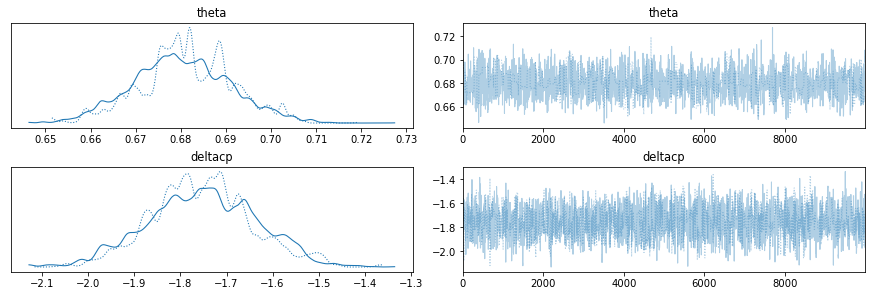

In [71]:
import arviz as az
az.plot_trace(trace)

Calculate the Mean and the 95% central credibility interval upper and lower limits for one of the parameters, using the numpy percentile function.

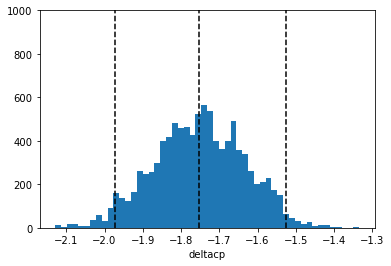

Mean, 2.5 and 97.5 percentiles, p = -1.75274 [-1.97226 , -1.52594] 


In [73]:
# Plot the posterior as a histogram
fig, ax = plt.subplots(1, 1)
plt.hist(trace["posterior"]["deltacp"][0], bins='auto')


p_mean=np.mean(trace["posterior"]["deltacp"][:])
p_low = np.percentile(trace["posterior"]["deltacp"][:], [2.5,97.5])[0]
p_high = np.percentile(trace["posterior"]["deltacp"][:], [2.5,97.5])[1]

plt.axvline(p_low, c='k', ls='--')
plt.axvline(p_high, c='k', ls='--');
plt.axvline(p_mean, c='k', ls='--');
ax.set_xlabel("deltacp")
#ax.set_xlim(0, 1)
ax.set_ylim(0, 1000)
plt.show()



print("Mean, 2.5 and 97.5 percentiles, p = %.5f [%.5f , %.5f] " % (p_mean, p_low, p_high))

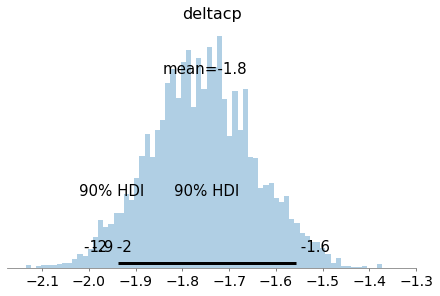

In [74]:
# We can extract and plot the mean of the posterior distribution as well as the 90% highest density interval.
import matplotlib.pyplot as plt
ax = pm.plot_posterior(trace, var_names="deltacp",multimodal=True, hdi_prob=0.90, kind='hist')

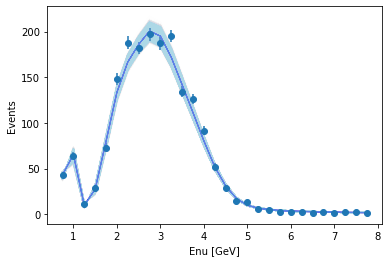

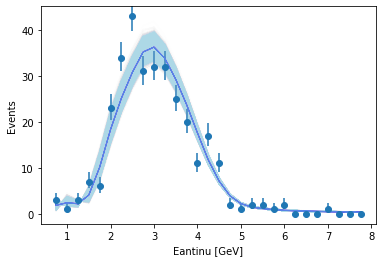

In [77]:
# Plot the best model fit on top of the data. We also draw the parameter 
# values randomly from the MCMC chain to plot to draw the uncertainty band.

#-----------------------------
# Plot the data
plt.errorbar(EData, Data1, yerr=[DataerrLow1,DataerrUp1], fmt='o')
#plt.ylim(0.0, 25.0)
plt.xlabel("Enu [GeV]")
plt.ylabel("Events")

#-----------------------------
# Get the mean parameter values from the posterior
p_mean_dCP=np.mean(trace["posterior"]["deltacp"][:])
p_mean_theta23=np.mean(trace["posterior"]["theta"][:])

#-----------------------------
# Plot the best-fit prediction using the mean values for the parameters
# and the Model
import theano
theano.config.compute_test_value = "ignore"
p1 = t.dscalar()
p2 = t.dscalar()
f = theano.function([p1, p2], GetVectorMeans(p1, p2))
plt.plot(EData, f(p_mean_theta23, p_mean_dCP)[0:len(Data1)], c='blue', label="Best fit")

#-----------------------------
# Plot the uncertainty band by evaluating the Model at the MCMC chain parameter values
#  
Neutrino_draws = []
Antineutrino_draws = []
draws_dCP = trace["posterior"]["deltacp"].to_numpy()[0]
draws_theta23 = trace["posterior"]["theta"].to_numpy()[0]

# Loop through the MCMC parameter values and evaluate the model prediction
for i in range(0, len(draws_dCP)):
    ran_draw_model = f(draws_theta23[i], draws_dCP[i])
    Neutrino_draws.append(ran_draw_model[0:len(Data1)])
    Antineutrino_draws.append(ran_draw_model[len(Data1):len(Data)])

Neutrino_draws = np.transpose(Neutrino_draws)
plt.plot(EData, Neutrino_draws , c='lightblue', alpha=0.01)
plt.show()


#-----------------------------
# Same as above but for the Antineutrino data
plt.errorbar(EData, Data2, yerr=[DataerrLow2,DataerrUp2], fmt='o')
#plt.ylim(0.0, 25.0)
plt.xlabel("Eantinu [GeV]")
plt.ylabel("Events")

plt.plot(EData, f(p_mean_theta23, p_mean_dCP)[len(Data1):len(Data)], c='blue', label="Best fit")
Antineutrino_draws = np.transpose(Antineutrino_draws)
plt.plot(EData, Antineutrino_draws , c='lightblue', alpha=0.01)
plt.show()



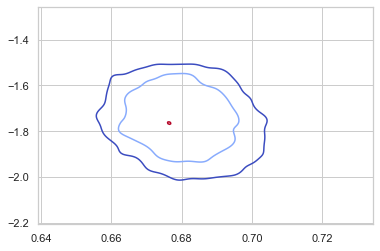

In [122]:
# Plot 2D Bayesian Credibility Region for 1-sigma and 90% intervals.
import seaborn as sns

# set seaborn whitegrid theme
sns.set(style="whitegrid")
sns.color_palette("rocket")
# plot
fig, ax = plt.subplots()
# The level here describes the cumulative mass outside the contour line!
# 90% (0.1), 68% (0.32), and 'best fit' (0.999)
#sns.kdeplot(ax = ax, y=tracedf1.deltacp, x=tracedf1.theta, cmap="coolwarm", levels=[0.1, 0.32, 0.999])
trace["posterior"]["deltacp"].to_numpy()[0]
sns.kdeplot(ax = ax, y=trace["posterior"]["deltacp"].to_numpy()[0], x=trace["posterior"]["theta"].to_numpy()[0], cmap="coolwarm", levels=[0.1, 0.32, 0.999])


plt.show()


**References**:

Long-Baseline Neutrino Facility (LBNF) and Deep Underground Neutrino Experiment (DUNE) Conceptual Design Report Volume 2: The Physics Program for DUNE at LBNF

https://arxiv.org/abs/1512.06148
